In [104]:
# import the required modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# import the dataset
df = pd.read_csv("data/german_data_clean.csv")

In [3]:
# explore data
df.head()

,checking_account,duration_months,credit_history,purpose,credit_amount,savings,present_employment_since,installment_rate,personal_status_sex,other_deptors,...,property,age_years,other_installment_plans,housing,existing_credits,job,people_liable_maintenance,telephone,foreign_worker,response
0,... < 0 euro,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0
1,0 <= ... < 102 euro,48,existing credits paid back duly till now,radio/television,5951,... < 51 euro,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,1
2,No checking account,12,critical account/other credits existing (not a...,education,2096,... < 51 euro,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,0
3,... < 0 euro,42,existing credits paid back duly till now,furniture/equipment,7882,... < 51 euro,4 <= ... < 7 years,2,male : single,guarantor,...,(if not real estate) building society savings ...,45,none,for free,1,skilled employee / official,2,none,yes,0
4,... < 0 euro,24,delay in paying off in the past,car (new),4870,... < 51 euro,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


In [4]:
# look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   checking_account           1000 non-null   object
 1   duration_months            1000 non-null   int64 
 2   credit_history             1000 non-null   object
 3   purpose                    1000 non-null   object
 4   credit_amount              1000 non-null   int64 
 5   savings                    1000 non-null   object
 6   present_employment_since   1000 non-null   object
 7   installment_rate           1000 non-null   int64 
 8   personal_status_sex        1000 non-null   object
 9   other_deptors              1000 non-null   object
 10  present_residence          1000 non-null   int64 
 11  property                   1000 non-null   object
 12  age_years                  1000 non-null   int64 
 13  other_installment_plans    1000 non-null   object
 14  housing  

In [5]:
# check the balance of the columns
df['response'].value_counts()

response
0    700
1    300
Name: count, dtype: int64

In [6]:
# specify the x and y column
x_columns = ['age_years', 'credit_amount', 'duration_months', 'purpose']
y_column = 'response'

In [7]:
# get the data from the DataFrame


['age_years', 'credit_amount', 'duration_months', 'purpose']

In [12]:
# create a data frame for the x-values
df_x = pd.get_dummies(df[x_columns])

In [17]:
# get all the column names of the DataFrame to a list
x_columns_dummies = list(df_x.columns)
x_columns_dummies

['age_years',
 'credit_amount',
 'duration_months',
 'purpose_business',
 'purpose_car (new)',
 'purpose_car (used)',
 'purpose_domestic appliances',
 'purpose_education',
 'purpose_furniture/equipment',
 'purpose_others',
 'purpose_radio/television',
 'purpose_repairs',
 'purpose_retraining']

In [22]:
# create the X and y
X = df_x[x_columns_dummies]
y = df[y_column].values

In [27]:
# split to a train- and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

In [28]:
# train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# generate predictions (discrete)
predictions = model.predict(X_test)


In [82]:
# generate predictions (probabilities)
predictions_probs =  model.predict_proba(X_test)

In [35]:
# create a DataFrame that will contain the predictions and actual values
df_preds = pd.DataFrame()

df_preds['prediction'] = predictions
df_preds['actual'] = y_test


In [38]:
# show the DataFrame
df_preds.head()

,prediction,actual
0,0,1
1,0,1
2,0,1
3,0,0
4,0,0


In [44]:
# create the confusion matrix
cf_matrix = confusion_matrix(df_preds['actual'], df_preds['prediction'])

Text(0.5, 23.52222222222222, 'Predicted Values')

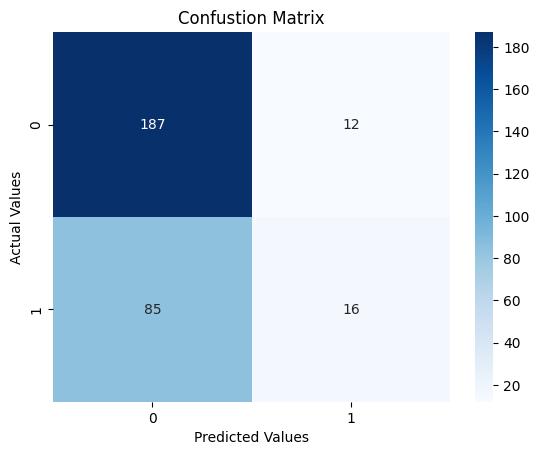

In [56]:
# use seaborn to visualize the matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt="g")

ax.set_title("Confustion Matrix")
ax.set_ylabel("Actual Values")
ax.set_xlabel("Predicted Values")

In [58]:
# use metrics
# accuracy
accuracy_score(df_preds['actual'], df_preds['prediction'])

0.6766666666666666

In [59]:
# precision
precision_score(df_preds['actual'], df_preds['prediction'])

0.5714285714285714

In [60]:
# recall/sentivity
recall_score(df_preds['actual'], df_preds['prediction'])

0.15841584158415842

In [61]:
# Recall/Sensitiviy: Rate the my model is able to detect a True
# From the standpoint of the actual value: "There is corona in this person, how is my model able to detect it?"
TP = 16
FN = 85

TP / (TP + FN)

0.15841584158415842

In [62]:
# Precision: Rate that my model is right in terms of True
# From the standpoint of the prediction: "My model predicts the person has corona. What is the rate that this is actually true."
FP = 12
TP = 16

TP / (TP + FP)

0.5714285714285714

In [92]:
# numpy array to select the score for 1
fpr, tpr, _ =  roc_curve(df_preds['actual'], predictions_probs[:,1])


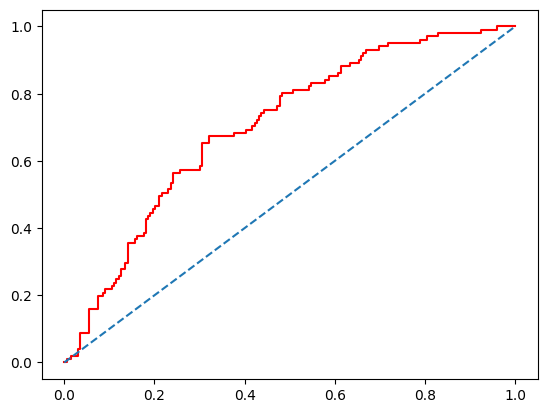

In [103]:
# Plot the curve
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], linestyle="--")


In [113]:
# calculate the AUC
roc_auc_score(df_preds['actual'], predictions_probs[:, 1])

0.7040151251306036

In [105]:
# PR-curve (for imbalanced data)
precision, recall, _ =  precision_recall_curve(y_test, predictions_probs[:,1])

Text(0.5, 0, 'Recall')

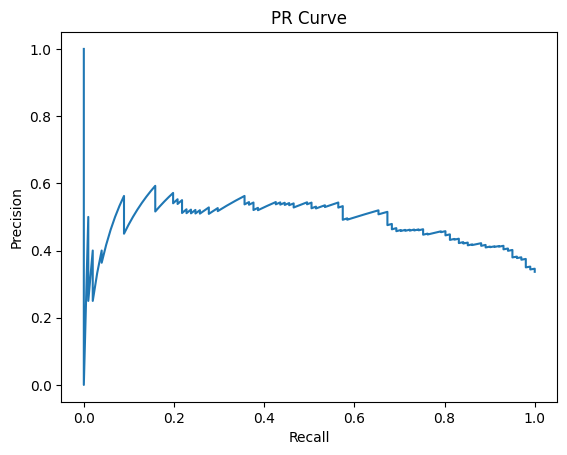

In [112]:
# Create the plots

fig, ax = plt.subplots()
ax.plot(recall, precision)
ax.set_title("PR Curve")
ax.set_ylabel("Precision")
ax.set_xlabel("Recall")

# H1 Extra: Coefficients

In [70]:
model.feature_names_in_

array(['age_years', 'credit_amount', 'duration_months',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_others',
       'purpose_radio/television', 'purpose_repairs',
       'purpose_retraining'], dtype=object)

In [79]:
my_model_coefficients = dict(zip(model.feature_names_in_, 
                                 list(model.coef_[0])))

In [80]:
my_model_coefficients

{'age_years': -0.03240795205274762,
 'credit_amount': 1.9303265569600095e-05,
 'duration_months': 0.039130887472242165,
 'purpose_business': -0.050938802885190065,
 'purpose_car (new)': 0.4852252729422663,
 'purpose_car (used)': -0.5306710392181193,
 'purpose_domestic appliances': 0.04202726460806753,
 'purpose_education': 0.13547740523647572,
 'purpose_furniture/equipment': -0.11800602263390544,
 'purpose_others': -0.019561668566992232,
 'purpose_radio/television': -0.5511655089561308,
 'purpose_repairs': 0.09759632052673789,
 'purpose_retraining': -0.07148896376074423}